# Reference

https://www.kaggle.com/ash316/eda-to-prediction-dietanic


모든 코드는 위 커널을 참고하였고, 필요한 부분만 정리하여 주석을 달았습니다.
더욱 자세하게 보고싶으시다면 위 커널을 참고해주세요. 

# Part 1: Pre-processing
## TODO: 
- 결측치 값 처리
- Categorical Data 처리 


### Import Module and Load Dataset

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
# 경로 설정 (노트북 파일 기점으로 상대경로 혹은 절대경로)
data = pd.read_csv('train.csv')
#data = pd.read_csv(r'C:\Users\Ki_Yoon_Yoo\Desktop\ToBigs/train.csv')

# Display first five rows 
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Exploration

In [56]:
# 어떤 종류의 feature 가 있는지 살펴봅시다
print('Types of Columns: ')
print(data.columns.values)

Types of Columns: 
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [57]:
# 연속 변수 통계치 확인 
print(data.describe())

## Age는 count를 보니 결측치가 많구나
"""
Survived,  PClass, SibSp, Parch 의 경우 연속변수처럼 취급하기 어려울 수도 있다? 
"""

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


'\nSurvived,  PClass, SibSp, Parch 의 경우 연속변수처럼 취급하기 어려울 수도 있다? \n'

In [58]:
# 각 피쳐의 data type 을 살펴봅시다 
print(data.dtypes)
"""

- Survived : 생존 유무 (1,0)
- PClass : 티켓 클라스 (1,2,3)
- SibSp : 동승한 형제 명수  
- Parch : 동승한 자녀/ 부모님 명수 

# int : 정수
# float : 소수점이 포함된 수
# object : 객체 (텍스트, 결측치 포함)
"""



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


'\n\n- Survived : 생존 유무 (1,0)\n- PClass : 티켓 클라스 (1,2,3)\n- SibSp : 동승한 형제 명수  \n- Parch : 동승한 자녀/ 부모님 명수 \n\n# int : 정수\n# float : 소수점이 포함된 수\n# object : 객체 (텍스트, 결측치 포함)\n'

### Null 값 처리 : Method 1 

In [59]:
data.loc[[0,1],['Fare','Name']]

,Fare,Name
0,7.2500,"Braund, Mr. Owen Harris"
1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th..."


In [60]:
data.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [61]:
# Null 값 개수 복습!
data.isnull().sum() # s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked 세 가지 feuture 에서 결측치가 존재하네요. 특히, 'Cabin' 의 경우 대부분의 데이터가 누락되었습니다. 'Cabin' 은 Cabin Number 로 좌석 위치를 의미하는 것 같습니다. A석, B석, C석 .. F 석 따라서 생존율에 영향이 있었을 것으로 보입니다. 다만, 결측치가 너무 많기 때문에 이 feature 를 활용하기 어려워보이네요. 

In [62]:
print(data['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [63]:
# axis를 명시해줘야만 0이 행 1이 열을 의미함
# 별로 유용해 보이지 않아서 삭제
data.drop('Cabin',axis=1).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


### Null 값 처리 : Method 2 (통계치, 외부 정보 활용)  

좌석 위치에 대한 직접적인 정보를 이용하기 보다는 'Null 값 여부' 정보를 이용해봅시다. 

In [64]:
# Fill 'NA' into Null value 
data['Cabin'].fillna('NA', inplace=True) # 50번의 nan이 NA로 바뀌었다.
print(data['Cabin'].unique())

['NA' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [65]:
# Conditional statement to fill 'Null' or 'Non_Null'
data.loc[data['Cabin']=='NA','Cabin_Null'] = 'Null'
data.loc[data['Cabin']!='NA','Cabin_Null'] = 'Non-Null'

In [66]:
data['Cabin_Null'].head()

0        Null
1    Non-Null
2        Null
3    Non-Null
4        Null
Name: Cabin_Null, dtype: object

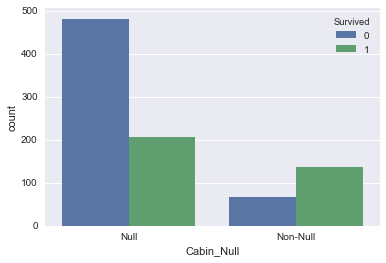

In [67]:
sns.countplot('Cabin_Null',hue='Survived',data=data)

In [68]:
data[['Cabin_Null','Survived']].groupby(['Cabin_Null']).sum()

,Survived
Cabin_Null,
Non-Null,136
Null,206


In [69]:
# 전체적인 비율별로 데이터를 볼 수 있다.
data[['Cabin_Null','Survived']].groupby(['Cabin_Null']).mean()

,Survived
Cabin_Null,
Non-Null,0.666667
Null,0.299854


- 좌석위치에 대한 정보가 있는 승객들의 생존율이 상대적으로 높습니다. 
- 이는 생존한 승객들이 추후에 정보를 제공할 기회가 있었다는 해석을 해볼 수 도 있겠네요. (물론, 뇌피셜입니다)
- 다만, 두 가지 군들의 (좌석정보가 없는 군 , 좌석정보가 있는 군) 표본 수가 다르다는 점이 주의할 점입니다.
    - n_1 = 687, n_2 = 204
- 통계수업이였다면 t-test 를 활용하겠지만, 저희는 모델의 성능만 높이면 됩니다. 따라서 모델의 넣어보고 성능에 영향을 끼치는지를 확인합시다 (다음주)! 

#### Age

In [70]:
data['Age'].isnull().sum()
# 177/891 = 19.2 % 

177

In [71]:
# 그냥 빠진걸 평균으로 채워넣기

# 산술평균 이용 inplace = 교체하기
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [72]:
# 중간값 이용 
data['Age'].fillna(data['Age'].median(), inplace=True)

- 통계치를 이용한 방법은 단순한 방법이지만, Feature 가 중요한 정보일수록 통계치를 통해 Null 값을 채워넣는 것은 모델 성능에 도움이 되지 않을수도 있겠네요.

- 따라서 다른 방법으로 나이를 최대한 추정해봅시다. 


In [73]:
# 탑승객의 이름은 다음과 같은 양식으로 기재되어있습니다. 
# Braund, Mr. Own Harris 의 Braund 는 first name / Owen Harris 는 last name 과 middle name 같군요
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [74]:
# regex 사용해서 성별 뽑아내기
for i in data:
    data['Initial']=data['Name'].str.extract('([A-Za-z]+)\.') # 온점(.) 뒤에 있는 이니셜 정보를 추출한뒤 저장합니다.

In [75]:
pd.crosstab(data['Initial'],data['Sex']).T.style.background_gradient(cmap='summer_r') #이니셜을 성별에 대해서 정렬

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 남성과 여성 중 가장 많은 이니셜을 Miss, Mrs, Mr 입니다. 
- 남성의 경우 40명이 "Master" 이라는 이니셜을 갖고 있네요. 단어만으로는 귀족의 느낌이 아는데 나이분포가 어떤지 살펴봅시다. 

In [76]:
data.loc[data['Initial'] == 'Master', 'Age'].head(10)
# 대부분 어려보이는데 29살은 뭘까요?? -> 잘못된 데이터 같대

7       2.000000
16      2.000000
50      7.000000
59     11.000000
63      4.000000
65     29.699118
78      0.830000
125    12.000000
159    29.699118
164     1.000000
Name: Age, dtype: float64

In [77]:
# 나머지는 이니셜을 모두 Mr. / Miss / Mrs 로 처리합시다. 
# 여성의 이니셜의 경우, 이니셜의 의미에 가장 부합하는 것 같은 카테고리 (Miss 혹은 Mrs)로 임의로 나눱습니다. 
# 귀족 이니셜은 'Other' 로 따로 묶었습니다
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Other','Other','Other'],inplace=True)

In [78]:
# 이제 남은 것은 다음과 같은 이니셜 뿐입니다.
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [79]:
# initial을 바탕으로 master의 평균 등을 넣는다.
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']= data.loc[data['Initial'] == 'Master', 'Age'].median()
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']= data.loc[data['Initial'] == 'Mr', 'Age'].median()
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']= data.loc[data['Initial'] == 'Mrs', 'Age'].median()
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']= data.loc[data['Initial'] == 'Miss', 'Age'].median()
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']= data.loc[data['Initial'] == 'Other', 'Age'].median()

In [80]:
print('Median Age for Master : ', data.loc[data['Initial'] == 'Master', 'Age'].median()) 
print('Median Age for Mr : ', data.loc[data['Initial'] == 'Mr', 'Age'].median()) 
print('Median Age for Mrs : ', data.loc[data['Initial'] == 'Mrs', 'Age'].median()) 
print('Median Age for Miss : ', data.loc[data['Initial'] == 'Miss', 'Age'].median()) 
print('Median Age for Other : ', data.loc[data['Initial'] == 'Other', 'Age'].median()) 

Median Age for Master :  4.0
Median Age for Mr :  29.69911764705882
Median Age for Mrs :  33.0
Median Age for Miss :  24.0
Median Age for Other :  50.0


### Categorical Feature 처리 

#### Nomial : 순서가 상관없는 Categorical

In [81]:
dummy_var = pd.get_dummies(data.Initial)
pd.get_dummies(data.Initial).head()

,Master,Miss,Mr,Mrs,Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [82]:
"""
data.drop(['Initial'], axis=1) : 기존에 존재하는 Initial column 제거된 Dataframe 

pd.concat() 을 통해 병합 
"""

"\ndata.drop(['Initial'], axis=1) : 기존에 존재하는 Initial column 제거된 Dataframe \n\npd.concat() 을 통해 병합 \n"

In [83]:
pd.concat([data.drop(['Initial'], axis=1),dummy_var], axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null,Master,Miss,Mr,Mrs,Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Null,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Non-Null,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Null,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Non-Null,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Null,0,0,1,0,0


#### Ordinal : 순서가 상관 있는 Categorical
##### 탑승권 순서

In [84]:
def transform_to_string(x):
    if x==1:
        return 'class1'
    elif x==2:
        return 'class2'
    else:
        return 'class3'

In [85]:
data['Pclass'] = data['Pclass'].apply(transform_to_string)
data['Pclass'].head(10)

0    class3
1    class1
2    class3
3    class1
4    class3
5    class3
6    class1
7    class3
8    class3
9    class2
Name: Pclass, dtype: object

In [86]:
# sklearn 인코딩 -> 순서 인코딩(값으로 바꿈)
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
mapper = [['class3'],['class2'],['class1']]
ordinal_encoder.fit(mapper)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [92]:
ordinal_encoder.transform(np.array(data['Pclass']).reshape(-1,1))

array([[2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],

In [94]:
data['new_Pclass'] = ordinal_encoder.transform(np.array(data['Pclass']).reshape(-1,1))

## 과제 1:
#### Target Encoding: 각 피쳐 값의 target variable 평균으로 인코딩


TODO : 
 - 개선된 'Initial' Feature 에 target encoding 을 적용하세요.
 - ['Mr', 'Mrs', 'Miss', 'Master', 'Other'] 총 5가지의 값이 0-1 사이의 값으로 변환되어야 합니다.
 - 인코딩된 feature 는 'Initial_encoded' 에 저장해주세요.

In [96]:
#https://maxhalford.github.io/blog/target-encoding-done-the-right-way/

#### Mean 값 찾기

In [109]:
# Target Encoding
# 질문이 생기는 부분(Target을 정하는건 어떤 기준으로? 만약에 mean이 같으면 어떻게 encoding 해야 하나?)
# -> 보통은 한 target으로 인코딩 하니까!!!
data.groupby('Initial')['Survived'].mean()

Initial
Master    0.575000
Miss      0.704301
Mr        0.161597
Mrs       0.795276
Other     0.166667
Name: Survived, dtype: float64

In [111]:
# 쉽게 값 replace 하는 방법
mapping = dict(data.groupby('Initial')['Survived'].mean())

In [112]:
mapping

{'Master': 0.575,
 'Miss': 0.7043010752688172,
 'Mr': 0.16159695817490494,
 'Mrs': 0.7952755905511811,
 'Other': 0.16666666666666666}

In [115]:
data["Initial"] = data["Initial"].map(mapping)

#### DataFrame 에 저장

In [117]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null,Initial,new_Pclass
0,1,0,class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Null,0.161597,2.0
1,2,1,class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Non-Null,0.795276,0.0
2,3,1,class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Null,0.704301,2.0
3,4,1,class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Non-Null,0.795276,0.0
4,5,0,class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Null,0.161597,2.0


# Part 2: Expoloratory Data Analysis (EDA)

### Visualization

In [31]:
plt.rc('font', size=20)
plt.rc('axes', titlesize=22, labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=22, labelsize=18)
plt.rc('ytick',labelsize=12)

#### Survivial Rate

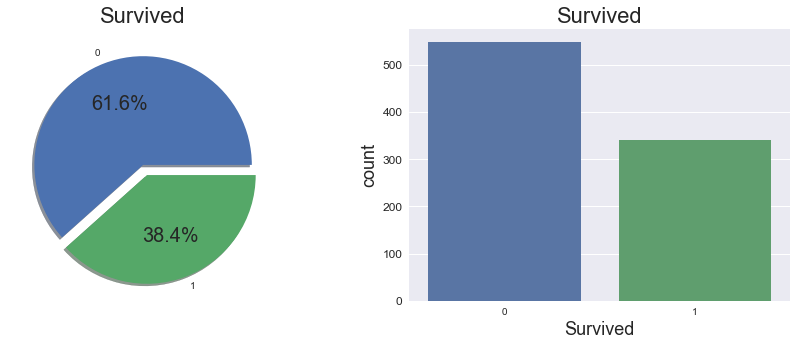

In [32]:
f,ax=plt.subplots(1,2,figsize=(15,5)) # (1,2) subplot 생성 
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
"""
explode : 부채꼴간 거리 
autopct : 소수점 표시 방식
ax : 어느 ax 에 표시 할 것인지 명시
"""
ax[0].set_title('Survived')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

#약 38 % 만 생존했음을 확인했습니다.

####  생존여부 vs. 성별 

In [33]:
data[['Sex','Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,314
male,577


In [34]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


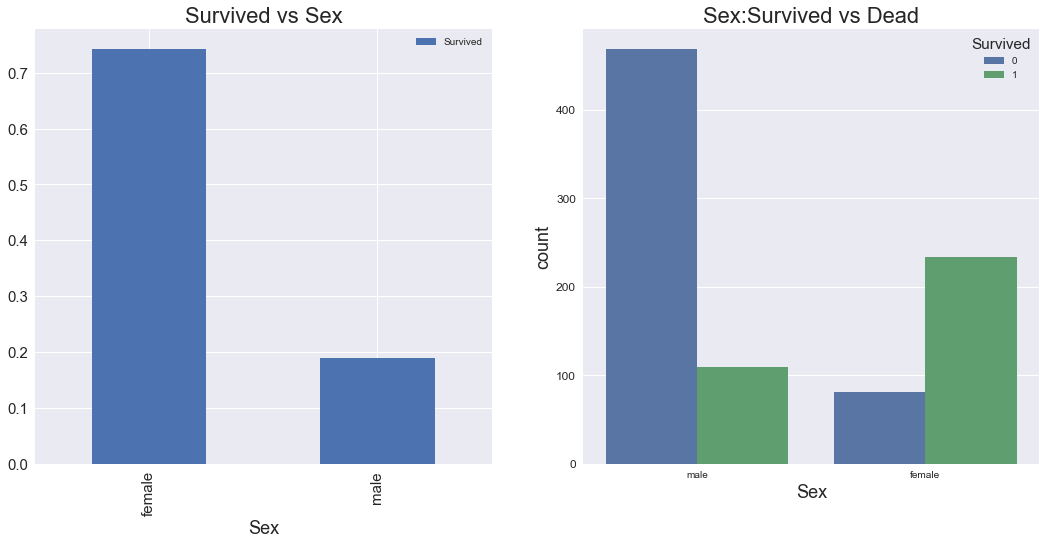

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0], fontsize=15)
ax[0].set_title('Survived vs Sex')
# hue 얘로 구분해서 그려라
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### 생존여부 vs. Pclass

In [36]:
pd.crosstab(data['Pclass'],data['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
class1,80,136,216
class2,97,87,184
class3,372,119,491
All,549,342,891


In [37]:
data[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
class1,0.629630
class2,0.472826
class3,0.242363


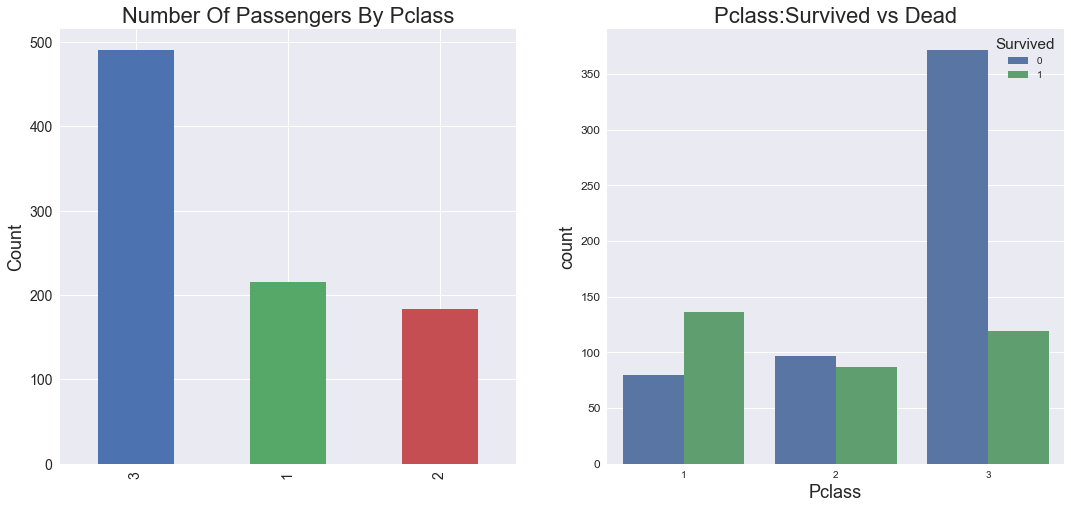

In [102]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0],fontsize=14)
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

'\n1등석 약 60%\n2등석 약 50% \n3등석 약 20%\n'

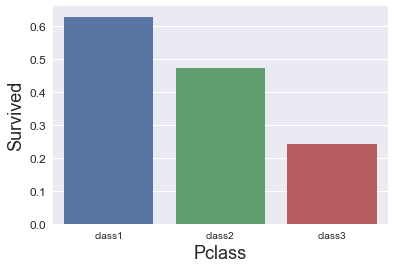

In [39]:
df = data[['Pclass','Survived']].groupby('Pclass').mean()
sns.barplot(x=df.index, y='Survived',data=df)
"""
1등석 약 60%
2등석 약 50% 
3등석 약 20%
"""

#### Age

In [40]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### 3차원 정보 

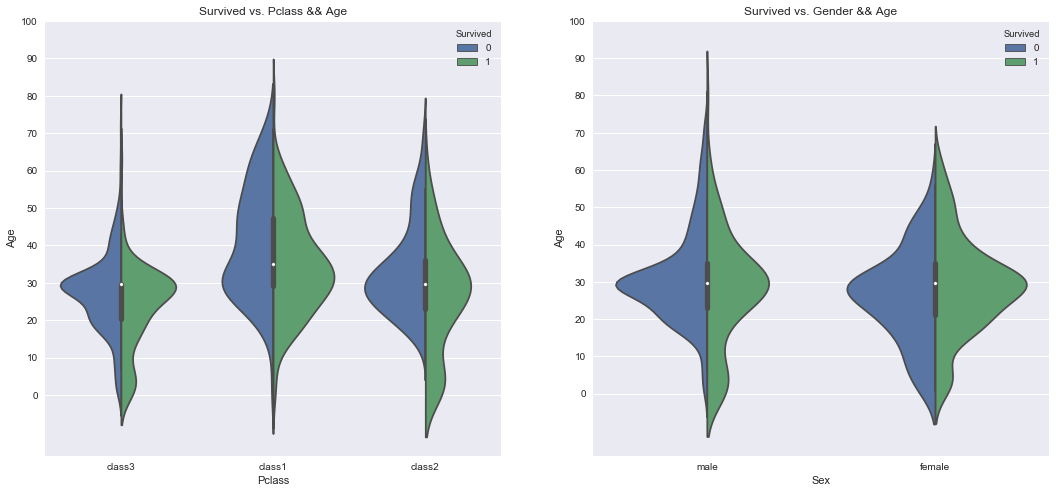

In [120]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Survived vs. Pclass && Age')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Survived vs. Gender && Age')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 아주 어린 탑승객 (10세 이하) 들의 생존율은 PClass 의 관계없이 높아보입니다. 

-  2등석과 3등석에 탔다면 나이가 적은 것이 생존율에 큰 영향을 주엇을 것 같네요. 다만, 1등석은 이 경향이 덜 합니다.

-  남성의 경우, 나이가 어릴 수록 생존율 높아지는 경향이 있습니다. 

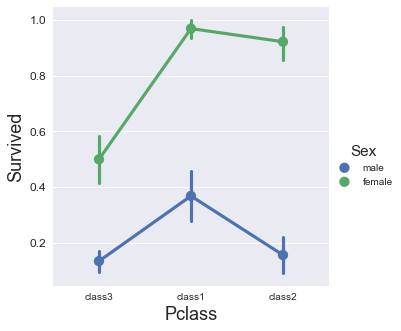

In [42]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

- 모든 좌석에서 여성이 생존율이 높은 것을 볼 수 있고, 또한 두 성별 모두 비싼 자리일수록 생존율이 높다는 것을 확인할 수 있습니다.

#### Correlation  

In [89]:
numerical_features = list(data.columns)[:-1]

In [93]:
data[numerical_features].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


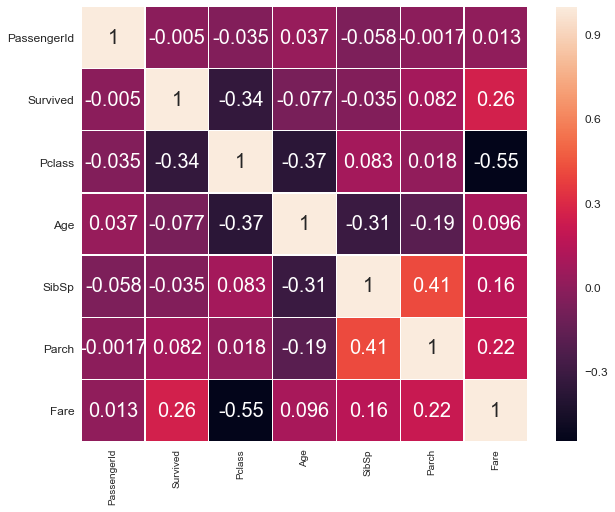

In [91]:
sns.heatmap(data[numerical_features].corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Pclass와 Fare는 큰 상관관계를 가지는데 굳이 둘다 같은 의미인걸 쓸 필요가 있을까 하는 고민을 할 수 있음.

- corr() method 를 통해 연속형 변수간 correlation matrix 를 쉽게 구성했습니다.
- 양의 값은 양의 상관관계, 음의 값은 음의 상관관계가 있음을 의미합니다.
- 가장 큰 상관관계는 PClass 와 Fare 에서 보이며 -0.55 의 을 갖고있네요. 
- 선형회귀, 로지스틱 등 다중공산성 (multicollinearity) 에 취약한 모델을 사용할때 유의해야겠네요..! 